In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

# Load dataset
titanic = sns.load_dataset('titanic')

# Pandas

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
pd.Series([1, 90, 'hey', np.nan], index=['a', 'B', 'C', 'd'])

a      1
B     90
C    hey
d    NaN
dtype: object

In [4]:
pd.DataFrame({'day': [17, 30], 'month': [1, 12], 'year': [2010, 2017]})

,day,month,year
0,17,1,2010
1,30,12,2017


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
# Returns a scalar
# titanic.ix[4, 'age']
titanic.at[4, 'age']

35.0

In [7]:
# Returns a Series of name 'age', and the age values associated 
# to the index labels 4 and 5
# titanic.ix[[4, 5], 'age']
titanic.loc[[4, 5], 'age']

4    35.0
5     NaN
Name: age, dtype: float64

In [8]:
# Returns a Series of name '4', and the age and fare values 
# associated to that row.
# titanic.ix[4, ['age', 'fare']]
titanic.loc[4, ['age', 'fare']]

age       35
fare    8.05
Name: 4, dtype: object

In [9]:
# Returns a DataFrame with rows 4 and 5, and columns 'age' and 'fare'
# titanic.ix[[4, 5], ['age', 'fare']]
titanic.loc[[4, 5], ['age', 'fare']]

,age,fare
4,35.0,8.0500
5,NaN,8.4583


In [10]:
A = pd.Series(['a', 'b', 'c', 'd', 'e', 'f'])
A_filter = pd.Series([False, True, False, True, False, True, True])
A[A_filter]

1    b
3    d
5    f
dtype: object

In [11]:
titanic[
    (titanic.sex == 'female')
    & (titanic['class'].isin(['First', 'Third']))
    & (titanic.age > 30)
    & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
276,0,3,female,45.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,no,True
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True


In [12]:
s1 = pd.Series([10, 20, 30, np.nan], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([100, 200, 300, 400], index=['e', 'd', 'c', 'b'])
s1.add(s2)

a      NaN
b    420.0
c    330.0
d      NaN
e      NaN
dtype: float64

In [13]:
s1.align(s2)

(a    10.0
 b    20.0
 c    30.0
 d     NaN
 e     NaN
 dtype: float64, a      NaN
 b    400.0
 c    300.0
 d    200.0
 e    100.0
 dtype: float64)

In [14]:
df1 = pd.DataFrame({'a': [1]})
df2 = pd.DataFrame({'b': [2]})

# 1) Incorrect: Raises AttributeError since concat is not in the DataFrame namespace
df1.concat(df2) 

AttributeError: 'DataFrame' object has no attribute 'concat'

In [15]:
# 2) Correct
pd.concat([df1, df2], sort=True) 

,a,b
0,1.0,NaN
0,NaN,2.0


In [16]:
# 3) Correct, and equivalent to 2)
df1.append(df2, sort=True)       

,a,b
0,1.0,NaN
0,NaN,2.0


In [17]:
# 4) Incorrect: append does not accept the 'axis' arg. Should use pd.concat with axis='columns'
df2.append(df2, axis='columns') 

TypeError: append() got an unexpected keyword argument 'axis'

In [18]:
# Generate a small DataFrame of cities with their population, 
# and fake ages (years with the city status)
towns_dic = {
    'name': ['Southampton', 'Cherbourg', 'Queenstown', 'Montevideo'],
    'country': ['United Kingdom', 'France', 'United Kingdom', 'Uruguay'],
    'population': [236900, 37121, 12347, 1305000],
    'age': [np.random.randint(500, 1000) for _ in range(4)]
}
towns_df = pd.DataFrame(towns_dic)
towns_df

,name,country,population,age
0,Southampton,United Kingdom,236900,577
1,Cherbourg,France,37121,841
2,Queenstown,United Kingdom,12347,928
3,Montevideo,Uruguay,1305000,543


In [19]:
(titanic.merge(
  towns_df, 
  left_on='embark_town', right_on='name', 
  how='left',
  indicator=True,
  suffixes=('_passenger', '_city')
)).head()
# 'head' takes the last n elements of the DataFrame

,survived,pclass,sex,age_passenger,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,country,population,age_city,_merge
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Southampton,United Kingdom,236900.0,577.0,both
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Cherbourg,France,37121.0,841.0,both
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Southampton,United Kingdom,236900.0,577.0,both
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Southampton,United Kingdom,236900.0,577.0,both
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Southampton,United Kingdom,236900.0,577.0,both


In [20]:
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
age_groups = pd.cut(titanic.age, bins, labels=labels)
titanic['age_group'] = age_groups
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,adult
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,adult
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,teenager


In [21]:
groups = titanic.groupby(['age_group', 'alone'])
type(groups)

pandas.core.groupby.groupby.DataFrameGroupBy

In [22]:
groups.size()

age_group  alone
child      False     67
           True       2
teenager   False     23
           True      21
adult      False    216
           True     363
elder      False      4
           True      18
dtype: int64

In [23]:
100 * groups.size() / len(titanic)

age_group  alone
child      False     7.519641
           True      0.224467
teenager   False     2.581369
           True      2.356902
adult      False    24.242424
           True     40.740741
elder      False     0.448934
           True      2.020202
dtype: float64

In [24]:
def is_old_func(row):
    return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,adult,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,adult,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,teenager,False


In [25]:
def is_old_func_series(value):
    return value > 60
titanic['is_old'] = titanic['age'].apply(is_old_func_series)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,adult,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,adult,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,teenager,False


In [26]:
titanic.eval('is_old = age > 60', inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,adult,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,adult,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,teenager,False


In [27]:
%timeit -n100 titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
%timeit -n100 titanic['is_old'] = titanic['age'].apply(is_old_func_series)
%timeit -n100 titanic.eval('is_old = age > 60', inplace=True)

64.1 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
483 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.5 ms ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
p_titanic = titanic.drop_duplicates('age').pivot(index='age', columns='class', values='fare')
p_titanic.tail(3)

class,First,Second,Third
age,,,
71.0,34.6542,NaN,NaN
74.0,NaN,NaN,7.775
80.0,30.0000,NaN,NaN


In [29]:
pt_titanic = titanic.pivot_table(index='age', columns='class', values='fare')
pt_titanic.tail(3)

class,First,Second,Third
age,,,
71.0,42.0792,NaN,NaN
74.0,NaN,NaN,7.775
80.0,30.0000,NaN,NaN


In [30]:
titanic.pivot_table(index='embark_town', columns='age_group', values='fare', aggfunc=np.median)

age_group,child,teenager,adult,elder
embark_town,,,,
Cherbourg,18.7875,14.4542,49.5042,49.5042
Queenstown,29.1250,7.7500,7.7500,7.7500
Southampton,27.9000,14.2500,13.0000,26.5500


In [31]:
pd.melt(
    p_titanic.reset_index(),
    id_vars='age',
    var_name='class_renamed',
    value_vars=['First', 'Second', 'Third'],
    value_name='fare'
).tail(3)

TypeError: cannot insert an item into a CategoricalIndex that is not already an existing category

**Note** : This example broke since at the time of the blogpost, Categoricals didn't exist. But we can fix it with a simple type cast.

In [32]:
p_titanic_copy = p_titanic.copy()
p_titanic_copy.columns = p_titanic_copy.columns.astype(str)
pd.melt(
    p_titanic_copy.reset_index(),
    id_vars='age',
    var_name='class_renamed',
    value_vars=['First', 'Second', 'Third'],
    value_name='fare'
).tail(3)

,age,class_renamed,fare
264,71.0,Third,NaN
265,74.0,Third,7.775
266,80.0,Third,NaN


In [33]:
titanic.pivot_table(index='embark_town', columns='age_group', aggfunc=np.median).fare

age_group,child,teenager,adult,elder
embark_town,,,,
Cherbourg,18.7875,14.4542,49.5042,49.5042
Queenstown,29.1250,7.7500,7.7500,7.7500
Southampton,27.9000,14.2500,13.0000,26.5500


In [34]:
groups.size().unstack()

alone,False,True
age_group,,
child,67,2
teenager,23,21
adult,216,363
elder,4,18


In [35]:
groups.size().unstack(level=0)

age_group,child,teenager,adult,elder
alone,,,,
False,67,23,216,4
True,2,21,363,18


# Seaborn

/home/eugenio/.local/share/virtualenvs/pandas-seaborn-blogpost-Jq8W8iYe/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


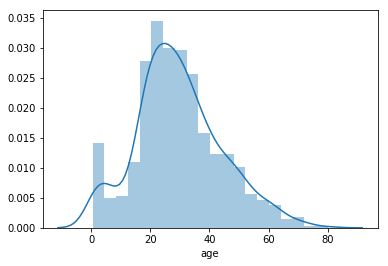

In [36]:
sns.distplot(titanic['age'].dropna())

/home/eugenio/.local/share/virtualenvs/pandas-seaborn-blogpost-Jq8W8iYe/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


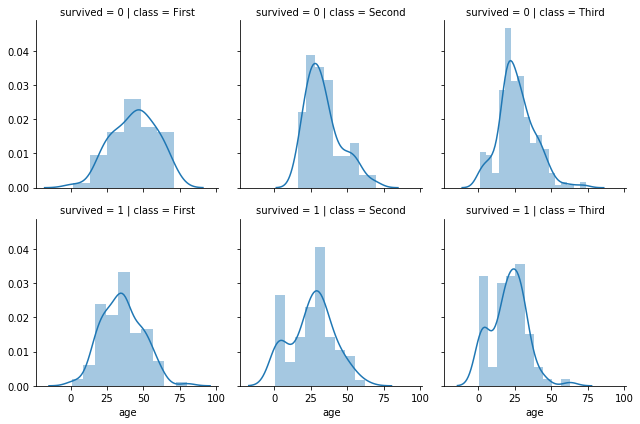

In [37]:
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")

/home/eugenio/.local/share/virtualenvs/pandas-seaborn-blogpost-Jq8W8iYe/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


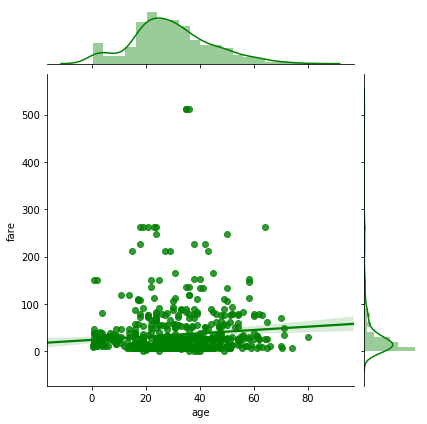

In [38]:
sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='g')

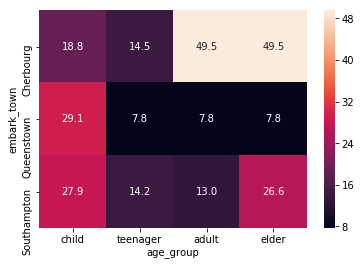

In [39]:
df = titanic.pivot_table(index='embark_town', columns='age_group', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")

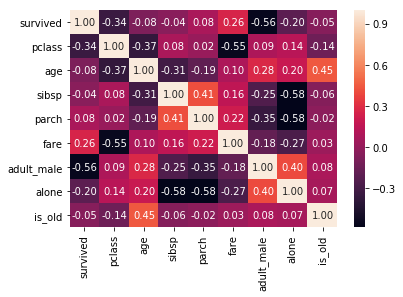

In [40]:
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")